In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import logging
import pickle
import glob

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.utils import check_random_state

from recnn.preprocessing import permute_by_pt
from recnn.preprocessing import extract

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

# Z 

In [3]:
filename_train = "../data/z/antikt-train-pp.pickle-py27"
filename_test = "../data/z/antikt-test-pp.pickle-py27"

rng = check_random_state(1)

# Make training data
print("Loading training data...")

fd = open(filename_train, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_train)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

# Preprocessing 
print("Preprocessing...")
X = [extract(permute_by_pt(jet)) for jet in X]
tf = RobustScaler().fit(np.vstack([jet["content"] for jet in X]))

for jet in X:
    jet["content"] = tf.transform(jet["content"])

# Make test data 
print("Loading test data...")

fd = open(filename_test, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_test)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

# Preprocessing 
print("Preprocessing...")
X = [extract(permute_by_pt(jet)) for jet in X]

for jet in X:
    jet["content"] = tf.transform(jet["content"])

Loading training data...
	filename = ../data/z/antikt-train-pp.pickle-py27
	X size = 58946
	y size = 58946
Preprocessing...
Loading test data...
	filename = ../data/z/antikt-test-pp.pickle-py27
	X size = 20000
	y size = 20000
Preprocessing...


## `n_hidden`

('roc_auc(z-n_hidden=10.pickle) =', 0.77586601500000008)


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in divide


('roc_auc(z-n_hidden=20.pickle) =', 0.77770817500000011)
('roc_auc(z-n_hidden=30.pickle) =', 0.78435816000000003)
('roc_auc(z-n_hidden=40.pickle) =', 0.7885559849999999)
('roc_auc(z-n_hidden=5.pickle) =', 0.769182425)
('roc_auc(z-n_hidden=50.pickle) =', 0.78720952999999994)


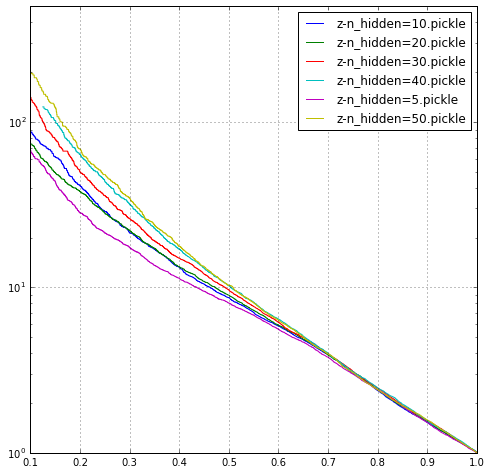

In [4]:
from recnn.recnn import grnn_predict_simple
from recnn.recnn import grnn_predict_gated
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

for f in sorted(glob.glob("../models/n_hidden/z*")):
    filename = f.split("/")[-1]
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()

    predict = grnn_predict_simple        
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
    #plt.plot(fpr, tpr, label=filename)
    plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()

## `step_size` / `decay`

('roc_auc(z-0.0005-0.7.pickle) =', 0.77776824499999997)


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in divide


('roc_auc(z-0.0005-0.8.pickle) =', 0.78065905000000002)
('roc_auc(z-0.0005-0.9.pickle) =', 0.78254845500000014)
('roc_auc(z-0.0005-1.0.pickle) =', 0.7871978850000001)
('roc_auc(z-0.001-0.7.pickle) =', 0.77946419)
('roc_auc(z-0.001-0.8.pickle) =', 0.78784652999999993)
('roc_auc(z-0.001-0.9.pickle) =', 0.79005279500000003)
('roc_auc(z-0.001-1.0.pickle) =', 0.78584924499999997)
('roc_auc(z-0.005-0.7.pickle) =', 0.77951053999999997)
('roc_auc(z-0.005-0.8.pickle) =', 0.77656680999999994)
('roc_auc(z-0.005-0.9.pickle) =', 0.76261990499999999)
('roc_auc(z-0.005-1.0.pickle) =', 0.76732752999999998)
('roc_auc(z-0.01-0.7.pickle) =', 0.77095371500000009)
('roc_auc(z-0.01-0.8.pickle) =', 0.76037013000000009)
('roc_auc(z-0.01-0.9.pickle) =', 0.75527534000000007)
('roc_auc(z-0.01-1.0.pickle) =', 0.76314271499999997)


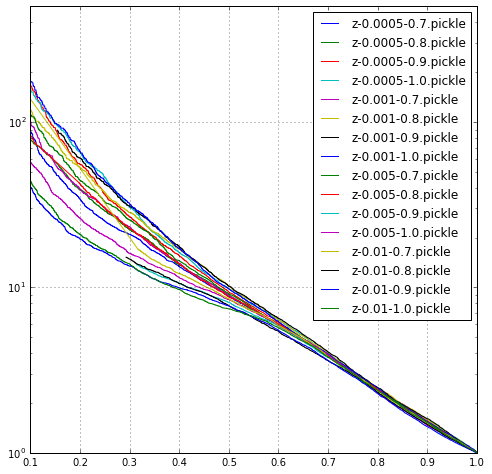

In [5]:
from recnn.recnn import grnn_predict_simple
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import glob

for f in sorted(glob.glob("../models/step_size+decay/z*")):
    filename = f.split("/")[-1]
    
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()

    predict = grnn_predict_simple
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
    #plt.plot(fpr, tpr, label="%s" % filename)
    plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()

('roc_auc(z-0.001-0.9.pickle) =', 0.79005279500000003)


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in divide


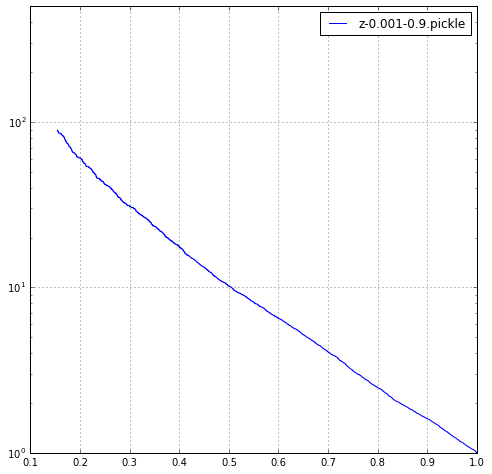

In [5]:
from recnn.recnn import grnn_predict_simple
from recnn.recnn import grnn_predict_gated
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

f = "../models/step_size+decay/z-0.001-0.9.pickle"
filename = f.split("/")[-1]

fd = open(f, "rb")
params = pickle.load(fd)
fd.close()

predict = grnn_predict_simple
y_pred = predict(params, X)

fpr, tpr, _ = roc_curve(y, y_pred)
print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
#plt.plot(fpr, tpr, label="%s" % filename)
plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()

Best so far:

```
- ../models/step_size+decay/z-0.001-0.9.pickle
- simple
- n_hidden=40
- step_size=0.001
- decay=0.9
- batch_size=64
- AUC = 0.790
```

---

# W

In [4]:
filename_train = "../data/w-vs-qcd/antikt-train-pp.pickle-py27"
filename_test = "../data/w-vs-qcd/antikt-test-pp.pickle-py27"

rng = check_random_state(1)

# Make training data
print("Loading training data...")

fd = open(filename_train, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_train)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

# Preprocessing 
print("Preprocessing...")
X = [extract(permute_by_pt(jet)) for jet in X]
tf = RobustScaler().fit(np.vstack([jet["content"] for jet in X]))

for jet in X:
    jet["content"] = tf.transform(jet["content"])

# Make test data 
print("Loading test data...")

fd = open(filename_test, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_test)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

# Preprocessing 
print("Preprocessing...")
X = [extract(permute_by_pt(jet)) for jet in X]

for jet in X:
    jet["content"] = tf.transform(jet["content"])

# Cropping
print("Cropping...")

# X_ = X
# y_ = y

X_ = [j for j in X if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]
y_ = [y[i] for i, j in enumerate(X) if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]

X = X_
y = y_

Loading training data...
	filename = ../data/w-vs-qcd/antikt-train-pp.pickle-py27
	X size = 180000
	y size = 180000
Preprocessing...
Loading test data...
	filename = ../data/w-vs-qcd/antikt-test-pp.pickle-py27
	X size = 20000
	y size = 20000
Preprocessing...
Cropping...


## `n_hidden`

('roc_auc(w-n_hidden=10.pickle) =', 0.88830563511792549)


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in divide


('roc_auc(w-n_hidden=20.pickle) =', 0.90248980717705019)
('roc_auc(w-n_hidden=30.pickle) =', 0.90298177195971541)
('roc_auc(w-n_hidden=40.pickle) =', 0.90595046773130761)
('roc_auc(w-n_hidden=5.pickle) =', 0.86504779170427537)
('roc_auc(w-n_hidden=50.pickle) =', 0.83040640391619047)


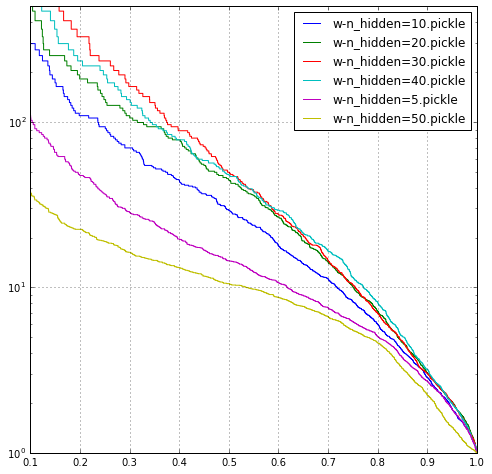

In [5]:
from recnn.recnn import grnn_predict_simple
from recnn.recnn import grnn_predict_gated
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

for f in sorted(glob.glob("../models/n_hidden/w*")):
    filename = f.split("/")[-1]
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()

    predict = grnn_predict_simple        
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
    
    #plt.plot(fpr, tpr, label=filename)
    plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()

## `step_size` / `decay`

('roc_auc(w-0.0005-0.7.pickle) =', 0.89619781651860708)


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in divide


('roc_auc(w-0.0005-0.8.pickle) =', 0.90192807045458467)
('roc_auc(w-0.0005-0.9.pickle) =', 0.90507171469762859)
('roc_auc(w-0.0005-1.0.pickle) =', 0.90241761500147866)
('roc_auc(w-0.001-0.7.pickle) =', 0.89968437359561482)
('roc_auc(w-0.001-0.8.pickle) =', 0.90421370654198729)
('roc_auc(w-0.001-0.9.pickle) =', 0.90091312729658768)
('roc_auc(w-0.001-1.0.pickle) =', 0.86995226119516356)
('roc_auc(w-0.005-0.7.pickle) =', 0.89377225622883993)
('roc_auc(w-0.005-0.8.pickle) =', 0.90287324167278116)
('roc_auc(w-0.005-0.9.pickle) =', 0.84341015784017059)
('roc_auc(w-0.005-1.0.pickle) =', 0.86027574368486148)
('roc_auc(w-0.01-0.7.pickle) =', 0.8395764006544042)
('roc_auc(w-0.01-0.8.pickle) =', 0.83989403931195883)
('roc_auc(w-0.01-0.9.pickle) =', 0.83766355002533988)
('roc_auc(w-0.01-1.0.pickle) =', 0.83544052889481446)


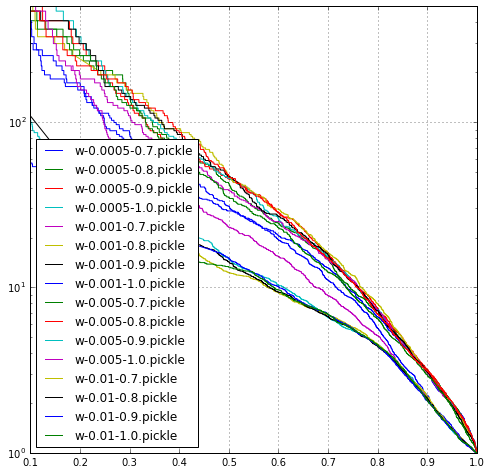

In [6]:
from recnn.recnn import grnn_predict_simple
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import glob

for f in sorted(glob.glob("../models/step_size+decay/w*")):
    filename = f.split("/")[-1]
    
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()

    predict = grnn_predict_simple
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
    #plt.plot(fpr, tpr, label="%s" % filename)
    plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()

('roc_auc(w-0.0005-0.9.pickle) =', 0.90507171469762859)


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in divide


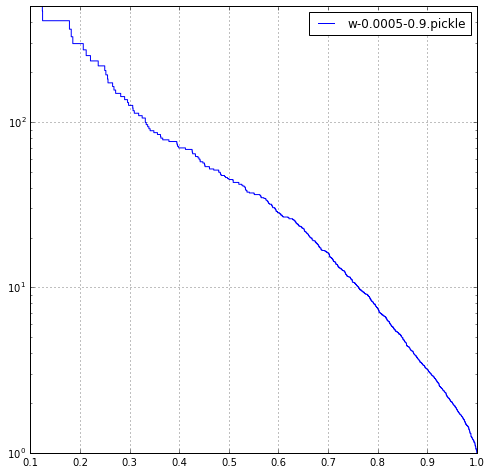

In [7]:
f = "../models/step_size+decay/w-0.0005-0.9.pickle"
filename = f.split("/")[-1]

fd = open(f, "rb")
params = pickle.load(fd)
fd.close()

predict = grnn_predict_simple
y_pred = predict(params, X)

fpr, tpr, _ = roc_curve(y, y_pred)
print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
#plt.plot(fpr, tpr, label="%s" % filename)
plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()

Best so far:
```
- w-0.0005-0.9.pickle
- simple
- n_hidden=40
- step_size=0.0005
- decay=0.9
- batch_size=64
- AUC = 0.905
```